# CO2 Emission Analysis and Prediction

### AiGlass 
`Seeing Through Data`

© Explore AI

---
<img src="https://dailyenergyinsider.com/wp-content/uploads/2022/05/shutterstock_2076711193.jpg" width=70%/>

## Overview
Carbon dioxide (CO2) is a colourless, odourless and non-poisonous gas formed by combustion of carbon and in the respiration of living organisms and is considered a greenhouse gas.

CO2 emissions from the burning of fossil fuels are the primary cause of global warming which happens to be one of the biggest threats facing humanity in this day and age. Although there are plenty of other emissions that are emitted on this earth, including Methane, nitrous oxide, and CFCs, none compare to the emission of CO2, and we as humans are mostly to blame for this. For this analysis we will be focosing on CO2 Emissions and its effect on the world we live in as well as some key factors and stats that may play a role in the emission of CO2 globally.

The world as we know it, is becoming more modernized by the year, and with this becoming all the more POLLUTED.

**According to UN Official Data States:**

    1. Over 3 BILLION PEOPLE of the world’s 8 Billion people are affected by degrading ecosystems 
    2. Pollution is responsible for some 9 MILLION premature deaths each year
    3. Over 1 million plant and animal species risk extinction
    4. 200 million people could be displaced EACH  YEAR by climate disruption by 2050.

Our Work is a continuation on the analysis done by [Benjamin from Minneapolis, Minnesota, United States](https://www.kaggle.com/lobosi) on Kaggle. The result of his analysis includes;

 * CO2 Emission has been increasing throughout the time period.
 * Coal and Petroleum/other liquids have been the dominant energy source for this time period.
 * CO2 Emission has been icreasing 1.71% yearlly on average, and has overall increased by 68.14% over the entire time period.
 * As of 2019, the average CO2 emission emitted was 10.98 (MMtonnes CO2) for the year.
 * The top CO2 emitters over the entire time period have been China and The United States, both exceding nearlly 4x or more the amount of every other country.
 * Throughout the time period, China and India have increased there CO2 Emissions the most out of every other country.
 * Throughout the time period, Former soviet republics have had the largest decrease in CO2 emission, The United Kingdom and Germany have also decreased there emissions a bit as well.
 * Generally speaking, the larger the population, the more CO2 the country will be likely to emit.
 * The larger the GDP, the more likely the country will have a high CO2 emission.
 * The larger the Energy Consumption of a country, the larger the CO2 emission.
 * A high or low Energy Intensity by GDP of Energy Intensity per capita isnt necesarilly predictive of a large CO2 emission, but generally speaking the lower it is the better (the more energy conserved means less CO2 emitted).

The dataset used is broadly catategorizing all emitters, transportation, lifestyle, industry etc.. into one total amount for each energy type.

This notebook looks to further in the analysis and building of several Machine Learning Models which can predict accurately the CO2 emission based of several parameters.

**Warning:** We are not a climate scientist, some things may be inacurate. This is simply just a study on a subject im interested in, allowing me to go deeper into the subject while at the same time imporving my graphing skills. All my sources are at the bottom of the notebook.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Feature Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we will be importing libraries used throughout our analysis and modelling which will allow us to call functions that are not part of your main python program, and briefly discuss them.

---

In [105]:
# Libraries for Anaysis
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import math

# Libraries for Plotting Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Setting Plot Design 
sns.set_style("darkgrid", {"axes.facecolor": "#eff2f5", 'grid.color': '#c0ccd8', 
                           'patch.edgecolor': '#B0B0B0', 'font.sans-serif': 'Verdana'})
sns.set_palette('Dark2_r')
plt.rc('font', size=19)
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.rc('figure', titlesize=24)

# Extra Plotting Tools Required for Bar Chart Race
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import missingno as msno

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split    # To split the data into training and testing data
from sklearn.preprocessing import StandardScaler        # For standardizing features
from sklearn.linear_model import LinearRegression       # For the LINEAR Model from Sklearn
from sklearn.linear_model import Ridge                  # For the RIDGE Regression module from sklearn
from sklearn.linear_model import Lasso                  # For the LASSO Model from Sklearn
from sklearn.model_selection import GridSearchCV        # To sort out our Hyper_Parameters
from sklearn.tree import DecisionTreeRegressor          # For the Decision-Tree Model
from sklearn.ensemble import RandomForestRegressor      # For the RandomForest Model
import xgboost as xgb                                   # For the xgBoost Model

# Libraries for calculating performance metrics
from sklearn.metrics import mean_squared_error          # Apply np.sqrt MSE to get RMSE
from sklearn import metrics                             # for checking performance
from sklearn.metrics import r2_score                    # for checking R-squared Error

# Libraries to Save/Restore Models
import pickle

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we will be loading the data from the CSV and EXCEL files into Pandas DataFrames. |

---

In [2]:
# Load Base Data
df = pd.read_csv("data/Our_CO2emission_Clean_Data.csv")

In [3]:
# View first 5 rows of Loaded Base Data
df.head()

Unnamed: 0 Country   e_type  Year   e_con  e_prod      GDP  Population  \
0           0   World      all  1988  345.56  347.41  42106.6  4927545.08   
1           1   World     coal  1988   96.87   98.48  42106.6  4927545.08   
2           2   World  nat_gas  1988   71.01   71.85  42106.6  4927545.08   
3           3   World  pet/oth  1988  133.45  132.49  42106.6  4927545.08   
4           4   World  nuclear  1988   19.23   19.23  42106.6  4927545.08   

   ei_capita  ei_gdp  CO2_emission  
0      70.13    8.21      21163.84  
1      70.13    8.21       8930.92  
2      70.13    8.21       3571.68  
3      70.13    8.21       8661.24  
4      70.13    8.21          0.00

In [4]:
# Drop Unamed Column
df = df.drop('Unnamed: 0', axis=1)

**Column descriptions:**
 * **Country** - Country in question
 * **Energy_type** - Type of energy source
 * **Year** - Year the data was recorded
 * **Energy_consumption** - Amount of Consumption for the specific energy source, measured (quad Btu)
 * **Energy_production** - Amount of Production for the specific energy source, measured (quad Btu)
 * **GDP** - Countries GDP at purchasing power parities, measured (Billion 2015\$ PPP)
 * **Population** - Population of specific Country, measured (Mperson)
 * **Energy_intensity_per_capita** - Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as  units of energy per unit of capita (capita = individual person), measured (MMBtu/person)
 * **Energy_intensity_by_GDP**- Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of GDP, measred (1000 Btu/2015\$ GDP PPP)
 * **CO2_emission** - The amount of C02 emitted, measured  (MMtonnes CO2)
 
It will also be exciting to see how we can enrich the dataset with extra features. Hence, We will adding the following datasets;
1. **Rate of population change** - To see if a possible change in population of a place will result in change in CO2 emission & to What extent
2. **Population density** - Does the density of a population have any effect on CO2 Emission?
3. **GDP splits** - Example, % for agriculture vs manufacturing; Hypothetically, GDP increase due to agricultural/Green activities should oppose the direct correlation of rise in GDP to CO2 Emission
4. **Rate of Deforestation** - As a result of our research on why the Dip in CO2 Emission of the World occurred in 2009 and the sudden rise in 2010 when Energy Type, Pop, and GDP were Constant.... 

From: [REUTERS: Carbon emissions dip in 2009, to jump in 2010 - report](https://www.reuters.com/article/idINIndia-53062920101121) `“The real surprise was that we were expecting a bigger dip due to the financial crisis in terms of fossil fuel emissions,” said Pep Canadell, executive director of the Global Carbon Project and one of the co-authors of the study published in the latest issue of the journal Nature Geoscience. Scientists say rising levels of CO2, the main greenhouse gas, from burning fossil fuels and deforestation is heating up the planet; So we had BURNING FOSSIL FUEL covered but not the impact of DEFORESTATION...` Then FROM: [Measuring Carbon Emissions from Tropical Deforestation: An Overview](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjLmN7jouz4AhVfYPEDHbXXDhoQFnoECAkQAw&url=https%3A%2F%2Fwww.edf.org%2Fsites%2Fdefault%2Ffiles%2F10333_Measuring_Carbon_Emissions_from_Tropical_Deforestation--An_Overview.pdf&usg=AOvVaw2x4oTsffUsBJzPk0S6DK_y) It states that Tropical deforestation contributes about 20% of annual global greenhouse gas (GHG) emissions and reducing it will be necessary to avoid dangerous climate change. China and the US are the world’s number one and two emitters, but numbers three and four are Indonesia and Brazil, with ~80% and ~70% of their emissions respectively from deforestation.

5. **Emission per Capita** - Also: probing into the theory that a unit increase in Population is directly impacting on the increase in CO2 Emission, we opted to getting a column which represents per capita emission for each country per energy type which will be plotted against the co2 emission and resulting graph compared with the graph of countries/population of highest emitters. The idea is if the comparism correlates, then our Hypothesis theory of increase in pop is directly propotional to increase in CO2 Emission, is 100% valid, if not; To be modified with extra clause.

In [5]:
# Load Population Growth (Rate of population change)
pop_df = pd.read_csv("data/Population_Growth_from_world_Bank_Integrate.csv")
# Load Population Density per Country
den_df = pd.read_excel('data/Population_Density_per_country_data.xls')
# Load Manufacturing GDP Contribution (GDP splits)
mgdp_df = pd.read_excel('data/GDP_split_Manufacturing_contribution_data_per_Country.xls')
# Load Agri GDP Contribution (GDP splits)
agdp_df = pd.read_excel('data/GDP_split_Agricultural_contribution_data_per_Country.xls')
# Load Deforestation Impact per country 
forest_df = pd.read_csv("data/Deforestation_data.csv") # Forest area (% of land area)
land_df = pd.read_csv("data/Land_Area_Data.csv") # Land Area (sq. km)
# Load Emission per Capita
df['emission_per_cap'] = df['CO2_emission']/df['Population']

In [6]:
# Check
pop_df.head(2)

Country Name      1988      1989      1990      1991  \
0                        Aruba -1.246457 -0.063879  1.816830  3.898739   
1  Africa Eastern and Southern  2.987172  2.956405  2.913059  2.871078   

       1992      1993      1994      1995      1996  ...      2012      2013  \
0  5.446052  6.048669  5.644930  4.610156  3.531110  ...  0.503385  0.583290   
1  2.832013  2.791294  2.751374  2.710420  2.673851  ...  2.763426  2.761496   

       2014      2015      2016      2017      2018      2019      2020  2021  
0  0.590508  0.541048  0.502860  0.471874  0.459266  0.437415  0.428017   NaN  
1  2.750400  2.732598  2.712218  2.690902  2.665620  2.636666  2.605427   NaN  

[2 rows x 35 columns]

In [7]:
# Check
forest_df.head(1)

Country Name                Indicator Name  1988  1989      1990      1991  \
0        Aruba  Forest area (% of land area)   NaN   NaN  2.333333  2.333333   

       1992      1993      1994      1995  ...      2012      2013      2014  \
0  2.333333  2.333333  2.333333  2.333333  ...  2.333333  2.333333  2.333333   

       2015      2016      2017      2018      2019      2020  2021  
0  2.333333  2.333333  2.333333  2.333333  2.333333  2.333333   NaN  

[1 rows x 36 columns]

**OBSERVATION:** After Careful studies, we observed that several countries have either been integrated into another or have had their names modified or changed thereby tending to result in lot's of missing values. SEE the table below

| Country Name in Data | Current Name | Replacement Name |**Special Case** |
| --- | --- | --- |--- |
| Burma | Myanmar | Myanmar |
| Congo-Brazzaville | Republic of the Congo | Congo, Rep. |
| Congo-Kinshasa | Democratic Republic of the Congo | Congo, Dem. Rep. |
| Côte d’Ivoire | --- | Cote d'Ivoire |
| Guadeloupe | overseas département and overseas region of FRANCE | **DROP** |
| Laos | Lao People's Democratic Republic | Lao PDR |
| Macau | special administrative region CHINA | Macao SAR, China |
| Martinique | Island and overseas territorial collectivity of FRANCE | **DROP** |
| North Korea | Korea, Dem. People's Rep. | Korea, Dem. People's Rep. | **Lump Together North & South Korea** |
| Reunion | Réunion La Réunion (French) | **DROP** |
| Saint Kitts and Nevis | Federation of Saint Christopher and Nevis | St. Kitts and Nevis |
| Saint Lucia | --- | St. Lucia |
| Saint Vincent/Grenadines | --- | St. Vincent and the Grenadines |
| South Korea | Korea, Dem. People's Rep. | --- | **Lump Together North & South Korea** |
| Taiwan | Republic of China (ROC) | **DROP** |
| The Bahamas | --- | Bahamas, The |
| Kyrgyzstan | Kyrgyz Republic | Kyrgyz Republic |
| Slovakia | Slovak Republic | Slovak Republic |
| Palestinian Territories | Israel | West Bank and Gaza |

So Let's proceed to making this changes...

In [8]:
'''
This countries Have been merged to Major countries already present
in our Dataset and won't be present in dataset adding the additional 
features, hence deleting them.
'''
# Drop Rows of Countries: Guadeloupe, Martinique, Reunion, Taiwan
df = df[df.Country.isin(['Guadeloupe', 'Martinique', 'Reunion', 'Taiwan'])==False]

# Decalre Replacement Names as Dict
replace_values = {'Burma' : 'Myanmar', 
                  'Congo-Brazzaville' : 'Congo, Rep.', 
                  'Congo-Kinshasa' : 'Congo, Dem. Rep.', 
                  "Côte d’Ivoire": "Cote d'Ivoire",
                  "Laos": 'Lao PDR', 
                  'Macau': 'Macao SAR, China', 
                  'Saint Kitts and Nevis': 'St. Kitts and Nevis',
                  'Saint Lucia': 'St. Lucia', 
                  'Saint Vincent/Grenadines': 'St. Vincent and the Grenadines',
                  'The Bahamas': 'Bahamas, The', 'Kyrgyzstan': 'Kyrgyz Republic', 
                  'Slovakia': 'Slovak Republic',
                  'Palestinian Territories': 'West Bank and Gaza'
                 }    
# Apply Replacement Names
df = df.replace({"Country": replace_values}) 

In [9]:
# Check
df[df['Country'] == 'Myanmar'].head(1)

Country e_type  Year  e_con  e_prod    GDP  Population  ei_capita  \
150  Myanmar    all  1988   0.09    0.08  26.35     40085.6       2.13   

     ei_gdp  CO2_emission  emission_per_cap  
150    3.23          4.83           0.00012

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we will be carrying out the initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---
Let's first Integrate the additional features prior to carrying out the EDA.

#### 3.1 Integrating Population Growth to Base DF

In [10]:
# Defining function that Integrates Pop_Growth
def add_pop_growth(row):
    
    val = pop_df.loc[pop_df["Country Name"].str.contains(row['Country']), str(row['Year'])]
    return round(float(list(val)[0]),3) if len(val)>0 else np.NaN

In [11]:
# Applying Fuction
df['pop_growth'] = df.apply(add_pop_growth, axis=1)

In [12]:
# Check for missing values
df[df["pop_growth"].isnull()]["Country"].unique()

array(['North Korea', 'South Korea', 'New Zealand', 'Kuwait', 'Eritrea'],
      dtype=object)

`North Korea & South Korea` needs to be collapse as one Country called `Korea, Dem. People's Rep`. While for 'New Zealand', 'Kuwait', 'Eritrea' the missing values will have to be delt with conventionally.

| Country | Year's with Missing Values | **Action** |
| --- | --- | --- |
| New Zealand | 1991 only | **Fill with mean/median** |
| Kuwait | 1992 to 1995  | **Fill with mean/median** |
| Eritrea | 2012 to 2019 | **Fill with mean/median** |

#### 3.2 Integrating Population Density to Modified DF

In [13]:
# Defining function that Integrates Pop_Density
def add_pop_den(row):
    
    val = den_df.loc[den_df["Country Name"].str.contains(row['Country']), str(row['Year'])]
    return round(float(list(val)[0]),3) if len(val)>0 else np.NaN

In [14]:
# Applying Fuction
df['pop_density'] = df.apply(add_pop_den, axis=1)

In [15]:
# Check for missing values
df[df["pop_density"].isnull()]["Country"].unique()

array(['Luxembourg', 'North Korea', 'South Korea', 'Kuwait', 'Kosovo'],
      dtype=object)

So we see a couple of additional missing values present in the population density Column for Countries 'Luxembourg', 'North Korea', 'South Korea', 'Kuwait', 'Kosovo'

We will look to treat this later
#### 3.3 Integrating GDP Split (Agric & Manuf) to Modified DF
The calculation of a country's GDP encompasses all private and public consumption, government outlays, investments, additions to private inventories, paid-in construction costs, and the foreign balance of trade. 

We will be focusing on Just the GDP Contributions of the Manufacturing & Agricultural Industries per country per time.

In [16]:
# Defining function that Integrates Manufacturing GDP Contribution
def add_gdp_manu(row):
    
    val = mgdp_df.loc[mgdp_df["Country Name"].str.contains(row['Country']), str(row['Year'])]
    return round(float(list(val)[0]), 3) if len(val)>0 else np.NaN

# Defining function that Integrates Agricuture GDP Contribution
def add_gdp_agri(row):
    
    val = agdp_df.loc[agdp_df["Country Name"].str.contains(row['Country']), str(row['Year'])]
    return round(float(list(val)[0]), 3) if len(val)>0 else np.NaN

In [17]:
# Applying Fuction Respectively
df['manuf_GDP'] = df.apply(add_gdp_manu, axis=1)
df['agri_GDP'] = df.apply(add_gdp_agri, axis=1)

It's also worthy of Note that the `manuf_GDP & agri_GDP` are percentage contribution of the overal GDP, Hence we'll have to extract the value for computation.

In [18]:
df['Manuf_GDP'] = (df['manuf_GDP']/100)*df['GDP']
df['Agric_GDP'] = (df['agri_GDP']/100)*df['GDP']

#### 3.4 Integrating Deforestation Data to Modified DF

In [19]:
# Defining function that Integrates Forest Area % of Land & Land Area Sq.M Data
def add_forest(row):
    
    val = forest_df.loc[forest_df["Country Name"].str.contains(row['Country']), str(row['Year'])]
    return round(float(list(val)[0]), 3) if len(val)>0 else np.NaN

def add_land(row):
    
    val = land_df.loc[land_df["Country Name"].str.contains(row['Country']), str(row['Year'])]
    return round(float(list(val)[0]), 3) if len(val)>0 else np.NaN

In [20]:
# Applying Fuction Respectively
df['Forest'] = df.apply(add_forest, axis=1)
df['Land'] = df.apply(add_land, axis=1)
# Get Exact Forest area in SqM
df['Deforestation'] = (df['Forest']/100)*df['Land'] 
# Note: we cleaned all land info below 1990 as to avoid errors since Forest data starts from 1990
# Drop redundant Forest & Land Columns
df = df.drop(['Forest', 'Land'], axis=1)

The forest data begins from year 1990, hence we will be experiencing missing values across all Countries for the years 1988 & 1989 and maybe a few others within the dataset.

#### 3.5 Extracting Emission per Capita
This refers to the per capita/person emission for each country per energy type

In [21]:
# Adding the emission_per_cap column
df['emission_per_cap'] = df['CO2_emission']/df['Population']

In [22]:
"""
Let's Reposition our Target variable 
CO2 Emission to the End of our Dataframe
"""
# Seperate Other Features From Target Variable
others = df.drop(['CO2_emission', 'emission_per_cap'], axis=1)
co = df[['emission_per_cap', 'CO2_emission']]
# Delete df
del df
# concat both Tables into fresh df
df = pd.concat([others, co], axis=1)
# Dropping % version of agric & Manufac GDP
df = df.drop(['manuf_GDP', 'agri_GDP'], axis=1)

In [23]:
df.head()

Country   e_type  Year   e_con  e_prod      GDP  Population  ei_capita  \
0   World      all  1988  345.56  347.41  42106.6  4927545.08      70.13   
1   World     coal  1988   96.87   98.48  42106.6  4927545.08      70.13   
2   World  nat_gas  1988   71.01   71.85  42106.6  4927545.08      70.13   
3   World  pet/oth  1988  133.45  132.49  42106.6  4927545.08      70.13   
4   World  nuclear  1988   19.23   19.23  42106.6  4927545.08      70.13   

   ei_gdp  pop_growth  pop_density  Manuf_GDP   Agric_GDP  Deforestation  \
0    8.21        1.77       39.285        NaN  2233.75513            NaN   
1    8.21        1.77       39.285        NaN  2233.75513            NaN   
2    8.21        1.77       39.285        NaN  2233.75513            NaN   
3    8.21        1.77       39.285        NaN  2233.75513            NaN   
4    8.21        1.77       39.285        NaN  2233.75513            NaN   

   emission_per_cap  CO2_emission  
0          0.004295      21163.84  
1          0.001812       8930.92  
2          0.000725       3571.68  
3          0.001758       8661.24  
4          0.000000          0.00

#### 3.6 Main EDA

<AxesSubplot:>

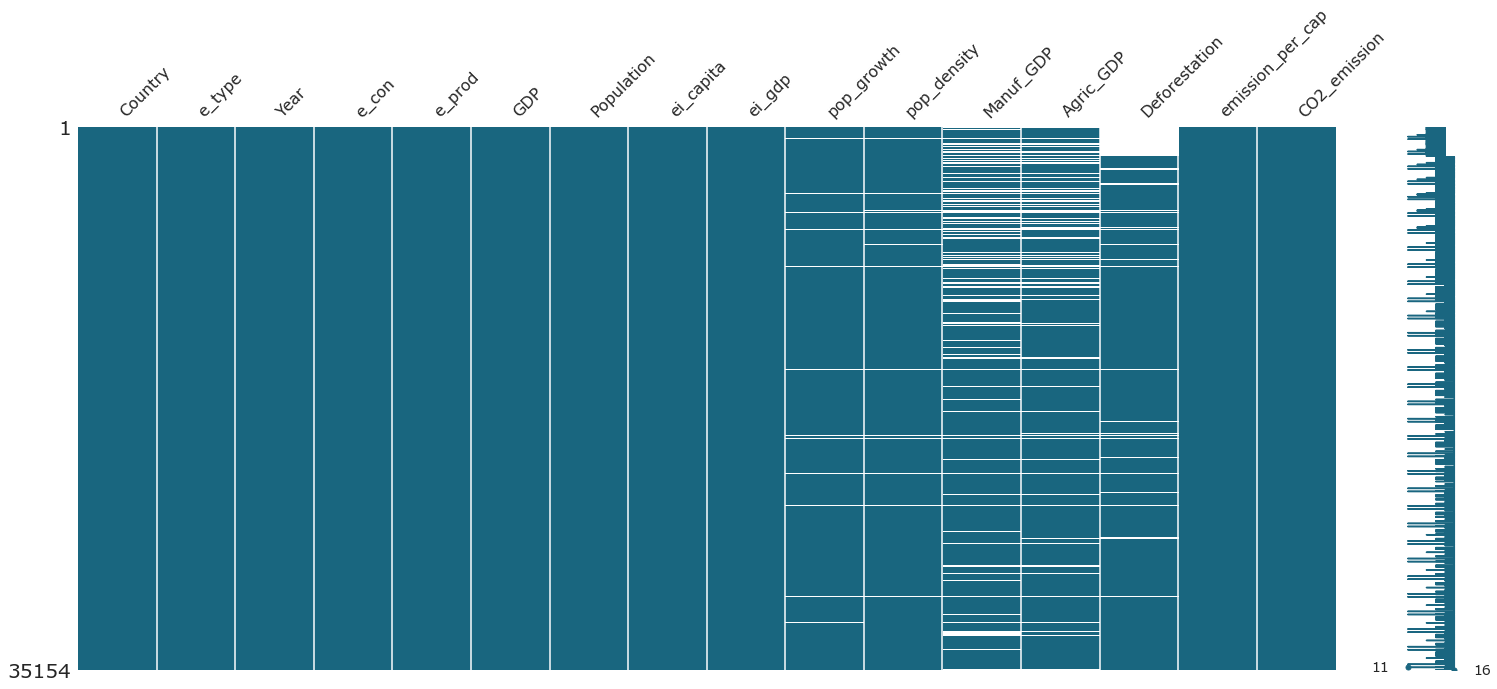

In [24]:
# Let's Visualize our missing values
msno.matrix(df, color=(0.1, 0.4, 0.5))

In [25]:
'''
As Temporary Defeat to dealing with our missing values
We Opted to dropping all rows with missing values

AS Base Analysis
'''

df.dropna(subset=['Deforestation', 'Agric_GDP', 'Manuf_GDP', 'pop_density', 'pop_growth'], inplace=True)

<AxesSubplot:>

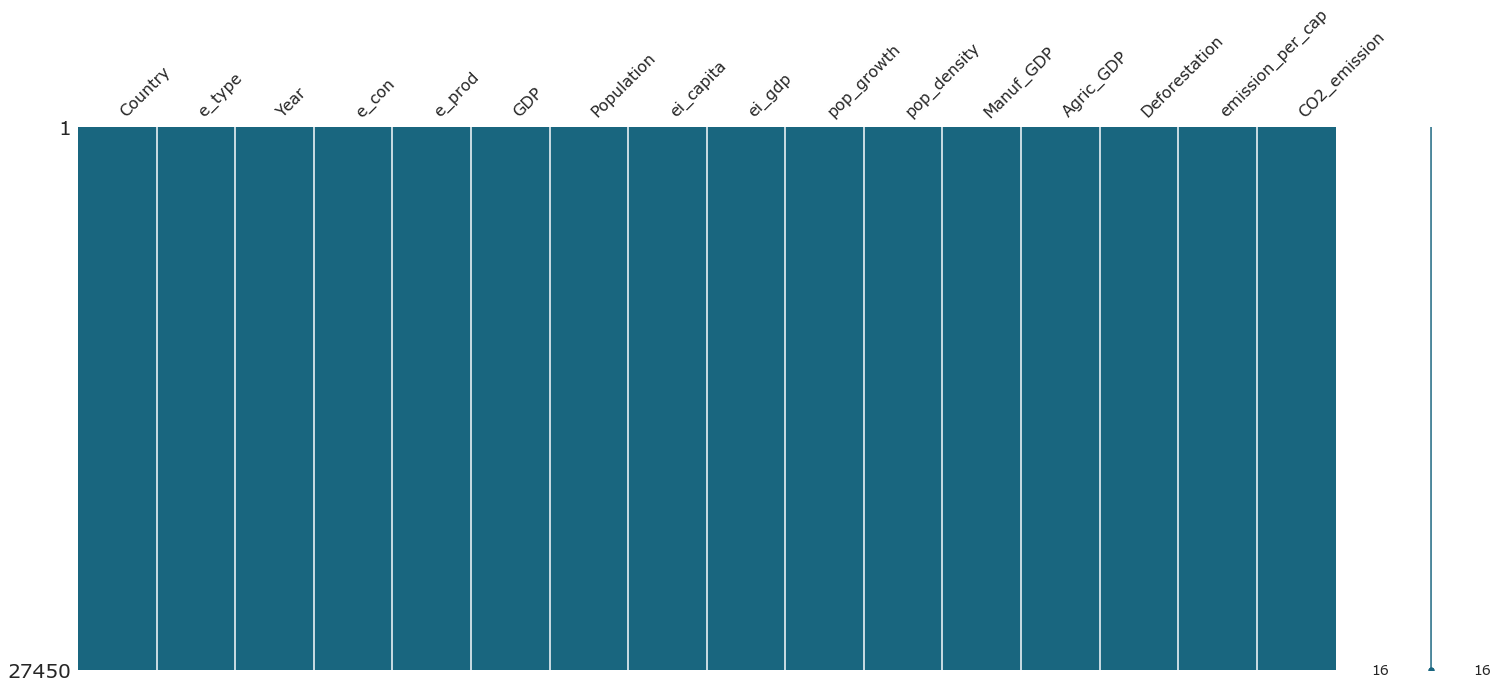

In [26]:
# Let's Visualize our missing values
msno.matrix(df, color=(0.1, 0.4, 0.5))

In [27]:
# More Information as concerning df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27450 entries, 1998 to 35921
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           27450 non-null  object 
 1   e_type            27450 non-null  object 
 2   Year              27450 non-null  int64  
 3   e_con             27450 non-null  float64
 4   e_prod            27450 non-null  float64
 5   GDP               27450 non-null  float64
 6   Population        27450 non-null  float64
 7   ei_capita         27450 non-null  float64
 8   ei_gdp            27450 non-null  float64
 9   pop_growth        27450 non-null  float64
 10  pop_density       27450 non-null  float64
 11  Manuf_GDP         27450 non-null  float64
 12  Agric_GDP         27450 non-null  float64
 13  Deforestation     27450 non-null  float64
 14  emission_per_cap  27450 non-null  float64
 15  CO2_emission      27450 non-null  float64
dtypes: float64(13), int64(1), object(2)
m

So We've dropped from `35154` Observations to `27510`, which to a certain extent, representative for our base analysis

In [29]:
# Used to compare for Max Values in Dataset
df[df['Country']  == 'World'].max()

Country                       World
e_type                      ren/oth
Year                           2016
e_con                        572.16
e_prod                       568.56
GDP                       115567.88
Population               7464042.85
ei_capita                      77.8
ei_gdp                         6.36
pop_growth                    1.427
pop_density                    57.2
Manuf_GDP              18685.014838
Agric_GDP               4791.444305
Deforestation       40666193.560053
emission_per_cap           0.004774
CO2_emission               34894.26
dtype: object

In [30]:
# Descriptive statistics of the whole Dataframe
round(df.describe(), 3)

Year      e_con     e_prod         GDP   Population  ei_capita  \
count  27450.000  27450.000  27450.000   27450.000    27450.000  27450.000   
mean    2005.446      1.505      1.519     826.836    64034.329     83.579   
std        8.351     15.480     15.211    5931.430   457125.183    117.500   
min     1990.000     -0.040      0.000       0.130       40.260      0.330   
25%     1999.000      0.000      0.000      13.850     2316.570     10.040   
50%     2006.000      0.020      0.000      54.140     7750.000     39.000   
75%     2013.000      0.220      0.130     288.390    23288.570    111.850   
max     2019.000    572.160    568.560  115567.880  7464042.850   1115.450   

          ei_gdp  pop_growth  pop_density  Manuf_GDP  Agric_GDP  \
count  27450.000   27450.000    27450.000  27450.000  27450.000   
mean       4.418       1.540      178.986    137.950     40.785   
std        4.110       1.470      559.028    989.154    240.220   
min        0.000      -6.766        1.406      0.001      0.008   
25%        2.370       0.557       28.453      1.310      1.226   
50%        3.660       1.426       71.594      6.509      4.818   
75%        5.390       2.456      147.139     43.143     16.724   
max      166.910      17.512     8044.526  18685.015   4791.444   

       Deforestation  emission_per_cap  CO2_emission  
count   2.745000e+04         27450.000     27450.000  
mean    3.950679e+05             0.002        89.633  
std     2.747431e+06             0.004       980.732  
min     0.000000e+00            -0.000        -0.010  
25%     4.902860e+03             0.000         0.000  
50%     2.931996e+04             0.000         0.100  
75%     1.535988e+05             0.001         8.400  
max     4.066619e+07             0.056     34894.260

As We can see; the dataset 
* Spans between the period of 1990 to 2019, amounting to **29 years** spreed.
* A Total of **27,450** observations with no null values present.
* The barest minimum CO2 Emission was at **-0.0** due to the fact that there wasn't energy-produced(**0.0**), as compared to the maximum amount of CO2 Emission at **34894.0** owing to the fact that energy was produced at that level(**569.0**).   
* Also, One can see from the above information that as Population increases, the GDP also increases.
* Finally, The **Standard Deviation** signifies that all the numbers in the dataset don't share the same value and will require standardization prior to Modelling with it.
* It appears Over 75% of our has an Energy-Consumption & Energy-Production value of (**0.0**), This is due the large variation between the individual Countries (having most representations between 0.0 to about 0.2) and the **World** which is the sum of all energy_consumed for the all countries for that Year

Researching the unique Max Values: 

1. Our **World** data (Which is a sum of all Countries event per year): account for the highest `CO2_Emission`, `Deforestation`, `Agric_GDP`, `Manuf_GDP`, `Population`, `GDP`, `e_prod & e_con`, which is expected
2. **Singapore** [One of the most densely populated country following Macau](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj70LnjzPD4AhVF3RoKHcZFDTIQFnoECAgQAQ&url=https%3A%2F%2Fworldpopulationreview.com%2Fcountry-rankings%2Fcountries-by-density&usg=AOvVaw0NZof-0fn4h7xf23NA561Z): accounting for the Highest Population density of `8044.526000` in 2019
3. **Belarus** (Obviously one of the countries battling with High Energy Intensity): accounts for energy intensity per GDP of `166.91` in 1992
4. **Qatar** [One of the leading Energy consumers per capita](https://en.wikipedia.org/wiki/List_of_countries_by_energy_consumption_per_capita): accounting for energy intensity per capita of `1115.45` in year 2000
5.  **Qatar** [Qatar - Historical Population Growth Rate Data Saw Highest Peak in 2007](https://www.macrotrends.net/countries/QAT/qatar/population-growth-rate): accounting for energy intensity per capita of `17.512` in year 2007 of our Dataset, Which proves to be the highest so far

Due to this Unique conditions, we should experience a minute proportion of our dataset skewing as outliers which infact may not be.

In [31]:
# Check for Outliers
df.kurtosis()

Year                 -1.124145
e_con               753.757823
e_prod              777.430741
GDP                 223.488027
Population          194.205794
ei_capita            12.262635
ei_gdp              558.439920
pop_growth           16.155439
pop_density         118.636729
Manuf_GDP           201.239497
Agric_GDP           197.217857
Deforestation       190.553720
emission_per_cap     36.653357
CO2_emission        646.010606
dtype: float64

As anticipated;
majority of the values of the `Kurtosis are greater than 3`, it should mean the presence of outliers. High kurtosis in a data set is an indicator that data has heavy tails or outliers.

**However Scaling of the dataset is highly recommended**.

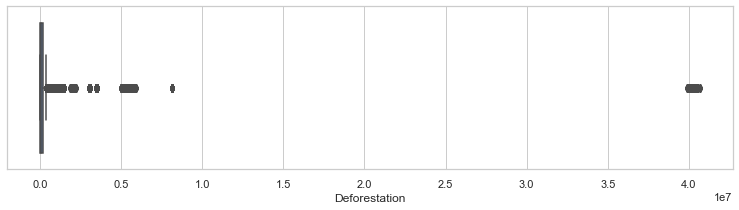

In [32]:
'''
A box plot for the Deforestation feature 
Proves the Extent The World Data vary from the individual countries
'''
sns.set(style="whitegrid")
plt.figure(figsize=(13,3))
ax = sns.boxplot(x='Deforestation', data=df, orient="v")

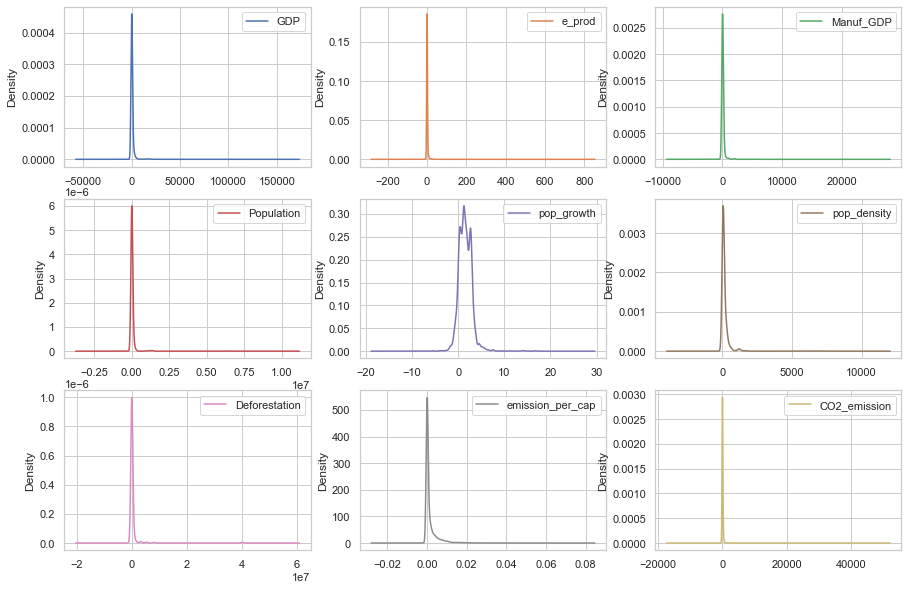

In [33]:
# Visualizing Feature Density Distribution
features = ['GDP', 'e_prod', 'Manuf_GDP', 'Population', 'pop_growth', 'pop_density', 
            'Deforestation', 'emission_per_cap', 'CO2_emission']
df[features].plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(15, 10));

As we can see, But for this unique characteristics of the countries & World data earlier discussed, causing a **highly Right skewed Dataset**, Our Dataset looks pretty **Normally Distributed**. This Unique values may not necessarily be outliers.

Data is skewed when its distribution curve is asymmetrical (as compared to a normal distribution curve that is perfectly symmetrical) and the skewness for a normal distribution is 0. It degrades the model’s ability (especially regression based models) to describe typical cases as it has to deal with rare cases on extreme values.

##### `We will be opting to Model with Tree-Based Models to Overcome any chances of this unique values being Outliers.`

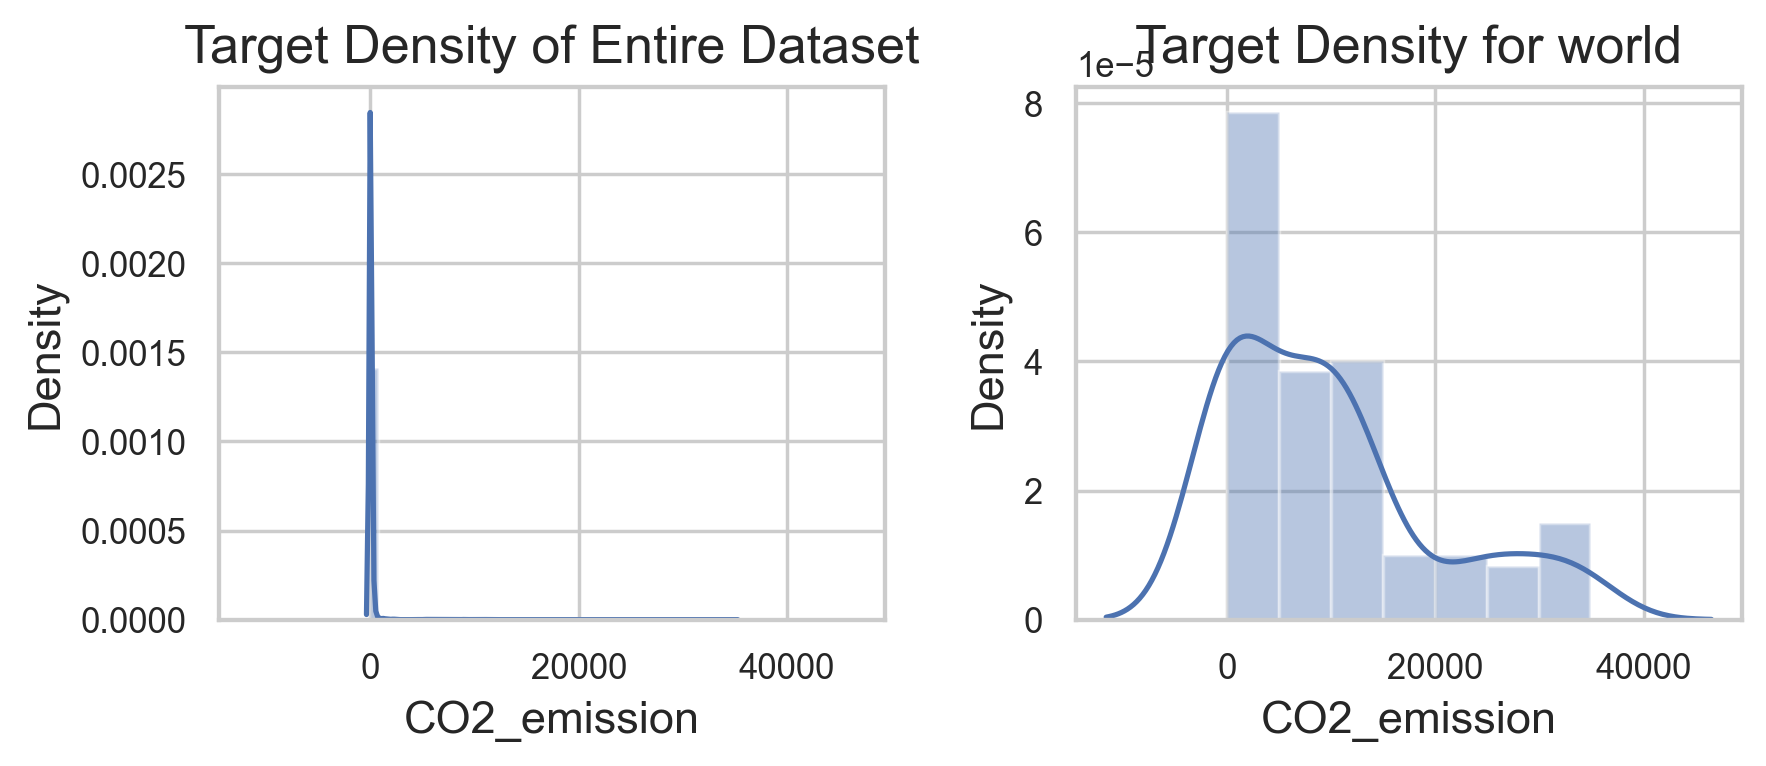

In [34]:
'''
A Plot of the univariate distribution of our Target data
Comparing the Entire Dataset & For World Dataset
'''
with plt.rc_context(rc = {'figure.dpi': 250, 'axes.labelsize': 13,
                          'xtick.labelsize': 10, 'ytick.labelsize': 10,
                          'legend.title_fontsize': 7, 'axes.titlesize': 15,
                          'axes.titlepad': 7}):

    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7,3))
    # Entire dataset
    sns.distplot(df['CO2_emission'], ax=ax[0]).set_title('Target Density of Entire Dataset')
    # Dataset only for world
    world = df[df['Country']=='World']
    sns.distplot(world['CO2_emission'], ax=ax[1]).set_title('Target Density for world')

    plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
    plt.show()

If we should have to deal with the possible outliers, We could apply one of the following options;
1. **log transformation:** transform skewed distribution to a normal distribution
2. **Find & Remove outliers**
3. **Normalize (min-max)**
4. **Adopting TREE-Based Modelling** To avoid much distortion of original data

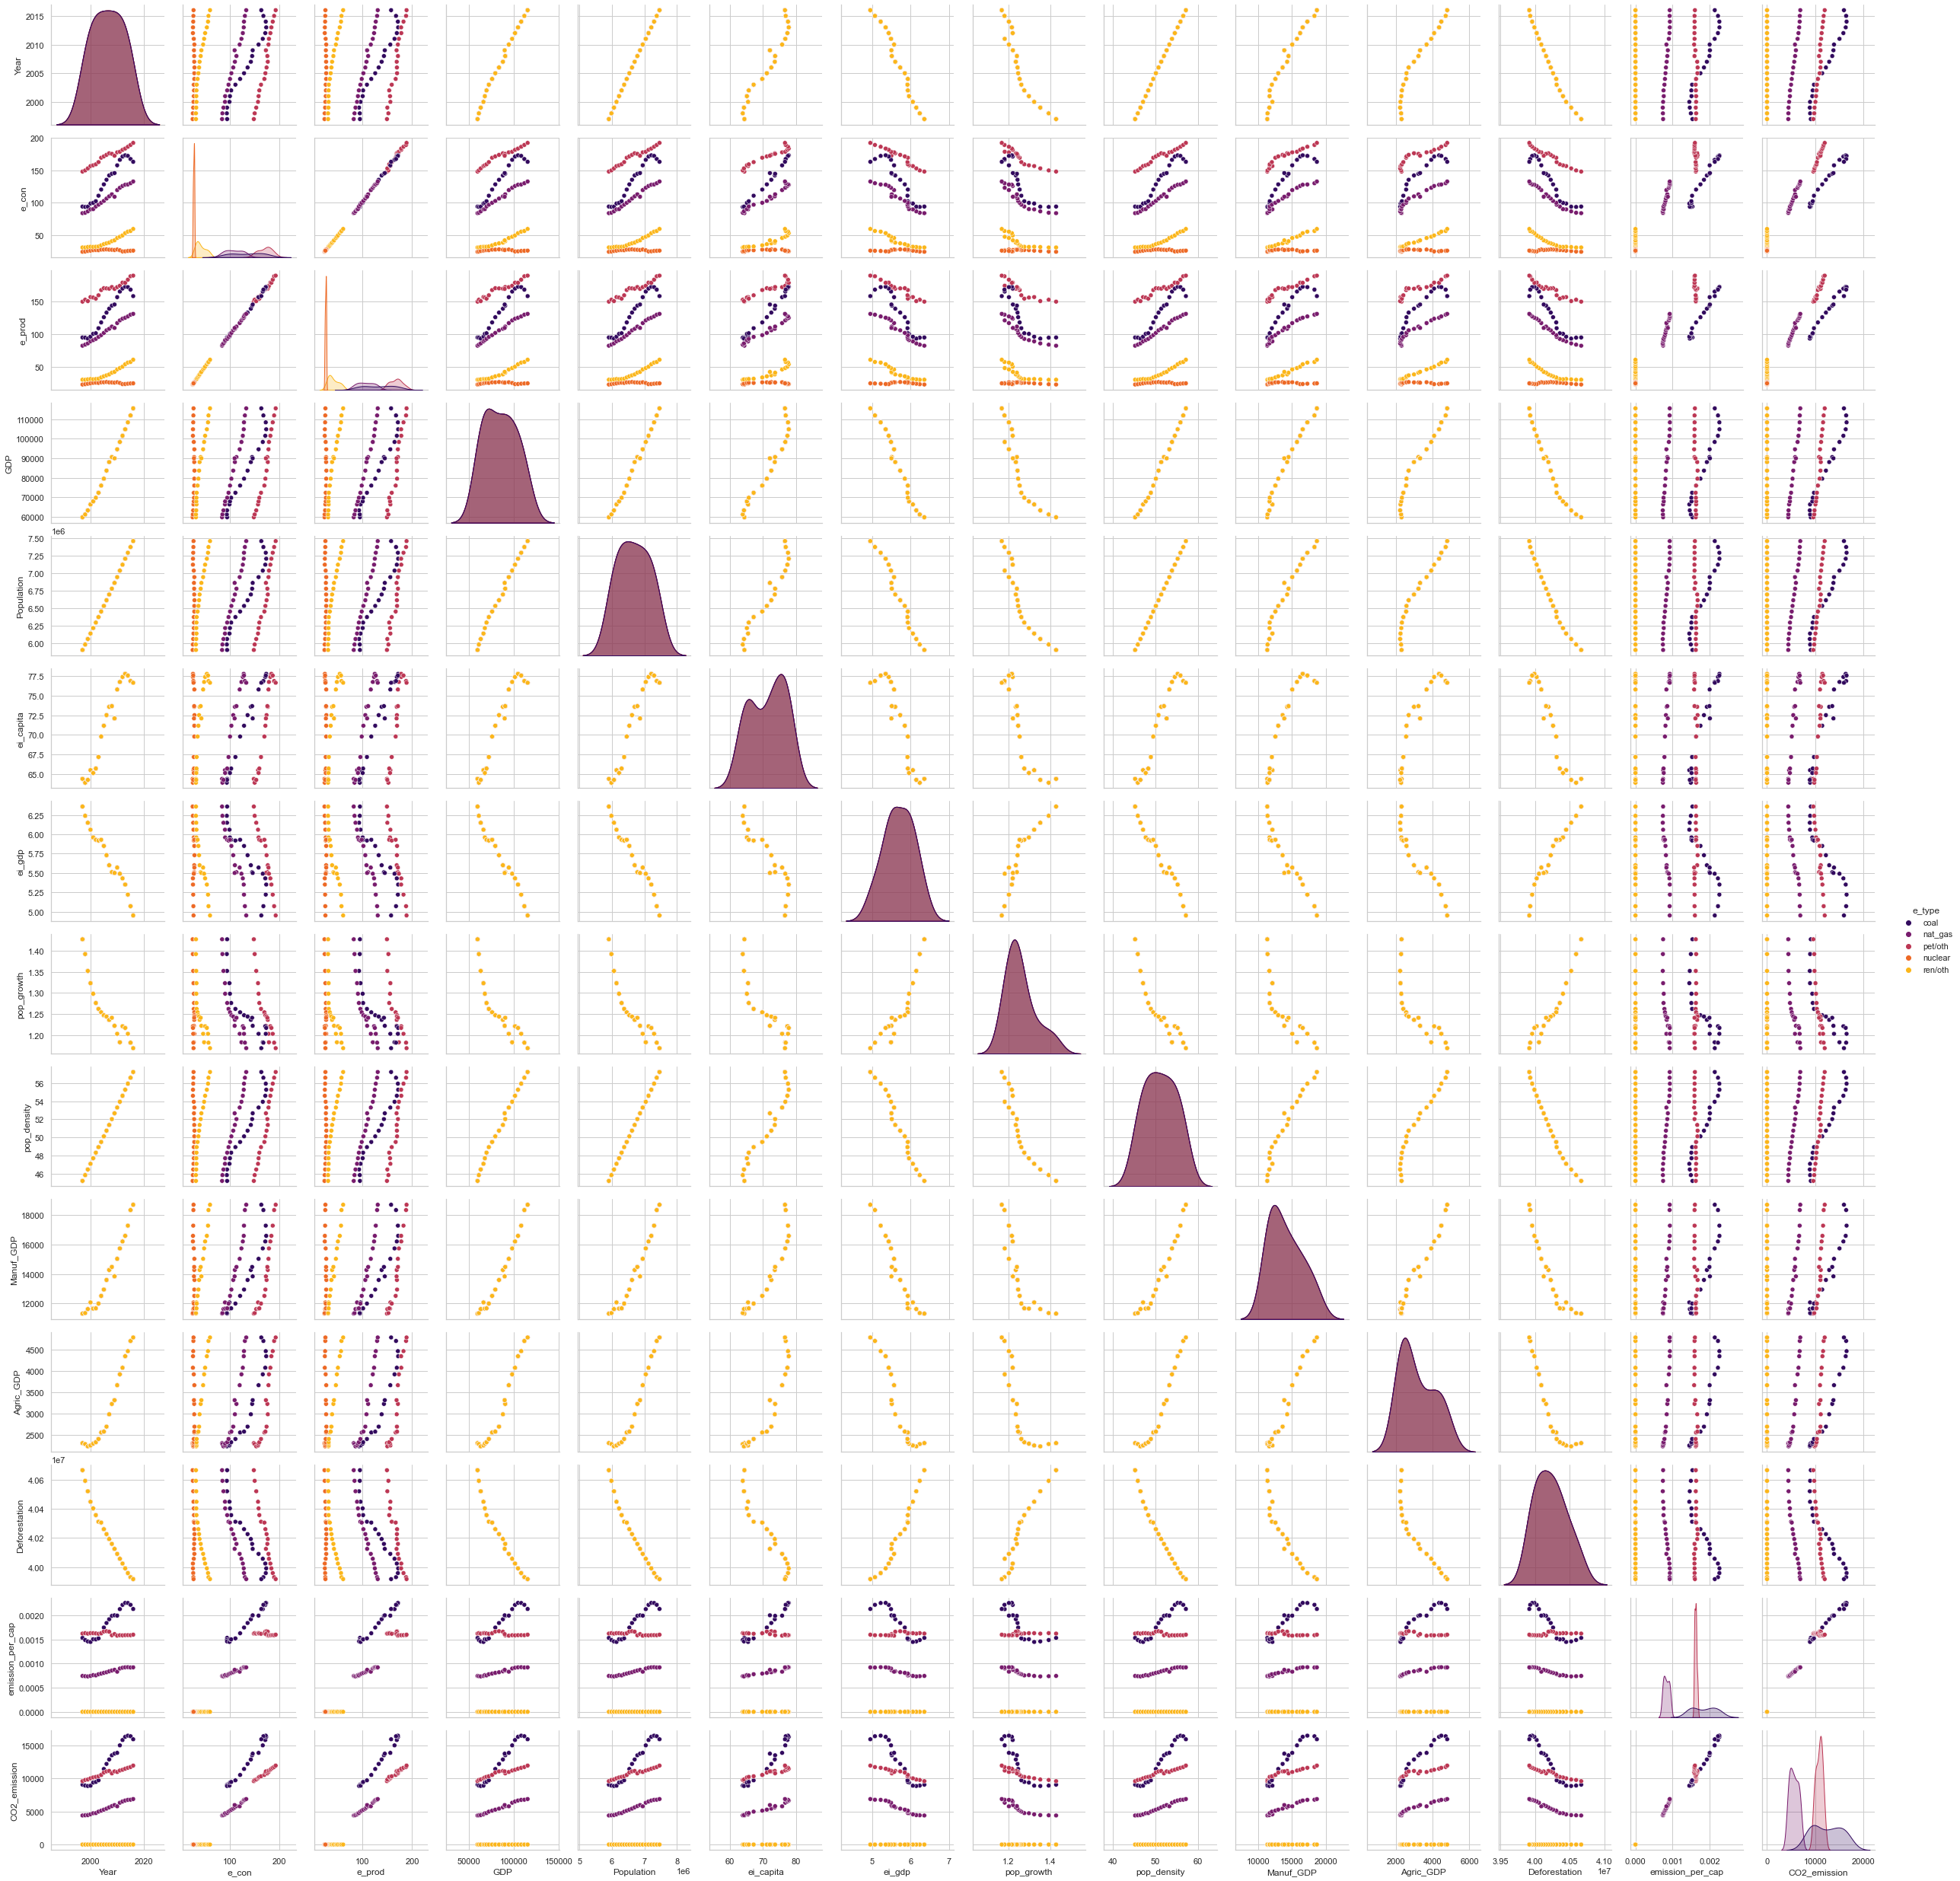

In [35]:
# A Pair Plotplot of relevant feature interactions
# for the world & for ALL Energy Type Category
temp_pp = df[df['Country']=='World'][df['e_type']!='all'] # Isolating only World & Energy Type = All
sns.pairplot(temp_pp, hue='e_type', palette="inferno")
plt.show()

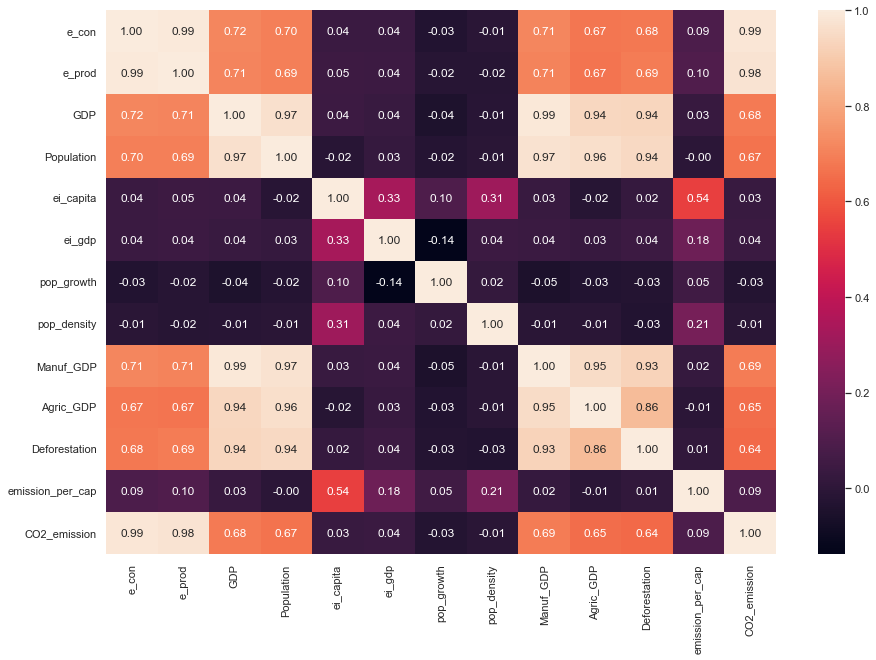

In [36]:
# evaluating Feature correlation Using HeatMap
plt.figure(figsize=(15,10))
sns.heatmap(data=df.iloc[:,3:].corr(), annot=True, fmt='.2f')
plt.show()

There is a very High Correlation between `Manuf_GDP, Agric_GDP against GDP`, Hence will be dropping GDP Column. 
Also `Energy Consumption vs Energy Production` are very correlated. One maybe Dropped during the course of our Feature Engineeriing.

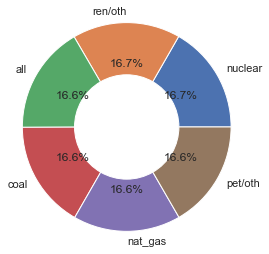

In [37]:
# A look at our Target_Feature distribution by Energy_Type
temp_dist = df.groupby('e_type').count()['CO2_emission'].reset_index().sort_values(by='CO2_emission',ascending=False)
temp_dist.style.background_gradient(cmap='winter')

percent = temp_dist['CO2_emission']
labels= temp_dist['e_type']

my_pie,_,_ = plt.pie(percent, radius = 1.2, labels=labels, autopct="%.1f%%")
plt.setp(my_pie, width=0.6, edgecolor='white') 
plt.show()

### 3.7 Some Comparative analysis

#### 3.7.1 Who produced the most CO2 Emissions over this time period?` vs `CO2 Emissions per Capita per Country over this time period

It is said: `On average, 1% increase in population is associated with a 1.28% increase in carbon dioxide emissions and With such magnitude, global emissions are likely to grow substantially over the next decades.---Development Research Group The World Bank`. But How true is this???

First: Let's visualize the rate of Population Growth as Represented by this Data

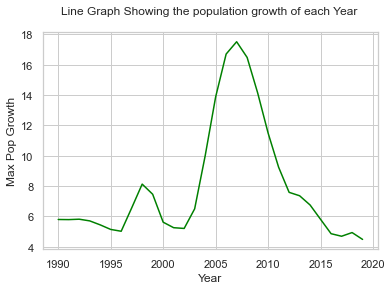

In [38]:
dates = list(set(df.Year)) # Extract the dates (X axis)

max_pop_growth = list(df.groupby("Year")["pop_growth"].max())  # List Max Pop Growth (y axis)

# Plot the line graph
plt.plot(dates, max_pop_growth, color='green') 
# Set axis and graph titles
plt.xlabel('Year')
plt.ylabel('Max Pop Growth')
plt.title('Line Graph Showing the population growth of each Year \n')
plt.show()

Plotting Max Pop_Growth across the years; Reveals a massive upsurge between 2006 to 2017 being its peak at **17.512%** (This Occured at Qatar in the year 2007), But we see again a steep decline till date which for our Theory is good news Globally.

Again Recall: We created `Emission per Capita` to probe fully the theory of `a unit increase in Population is directly impacting on the increase in CO2 Emission`, the column represents per capita emission for each country per energy type which will be plotted alongside the co2 emission of each country and resulting graph compared with the graph of countries/population of highest emitters. The idea is if the comparism correlates, then our Hypothesis theory of increase in pop is directly propotional to increase in CO2 Emission, is 100% valid, if not; The Theory then will require modification by adding the extra clause.

In [39]:
# Making temp dataset of all countries and there total CO2 emissions in the time period

# Specifying all countries != world, as well energy_types=all 
cd1 = df[df['Country']!='World'][df['e_type']=='all']

lt = []
for country in cd1['Country'].unique():
    total = cd1[cd1['Country']==country]['CO2_emission'].sum(axis=0)
    lt.extend([[country, total]])
lts = []
for country in cd1['Country'].unique():
    total = cd1[cd1['Country']==country]['emission_per_cap'].sum(axis=0)
    lts.extend([[country, total]])
# COMPARISON    
# Temporary dataset of all the Countries and there respective total CO2 Emission over the time period
temp_cd = pd.DataFrame(lt, columns=['Country', 'Total_CO2']).sort_values(by='Total_CO2',ascending=False)
# Temporary dataset of all the Countries and there respective total emission_per_capita over the time period
temp_cd2 = pd.DataFrame(lts, columns=['Country', 'emission_per_cap']).sort_values(by='emission_per_cap',ascending=False)

# Plotting the top 20 Emiters
fig = px.bar(temp_cd.head(20), x='Country', y='Total_CO2', title='Top 20 CO2 Emitters (MMtonnes CO2)')
# Plotting the top 20 emission_per_capita
fig2 = px.bar(temp_cd2.head(20), x='Country', y='emission_per_cap', 
              title='Top 20 Countries with emission_per_capita (MMtonnes CO2 per Pop)')
fig.show(), fig2.show()

(None, None)

In [40]:
'''
Let's Visualise the comparison using a line graph
'''
temp_td = temp_cd.copy()
# Create a df containing ranked countries, Total_C02 & emission_per_cap
temp_td = pd.merge(temp_td, temp_cd2, how="left", on='Country')
# Seperate country because it's an Object variable
others = temp_td.drop(['Country'], axis=1)
c = temp_td['Country']
# Scale the features to be compared to deal with Range Variation
sc = StandardScaler()
others_scaled = pd.DataFrame(sc.fit_transform(others), columns=others.columns)
# concat both Tables 
temp_td_scaled = pd.concat([c, others_scaled], axis=1)
# Plot Multiple line graph
fig4 = px.line(temp_td_scaled.head(30), x='Country', y=['Total_CO2', 'emission_per_cap'], title='Top 20 CO2 Emitters vs Top emitters_per_Capita')
fig4.show()

**From the Line Graph above**

This might be **TRUE** for `Population against CO2_Emission` But Totally **FALSE** when see the `Population vs CO2_Emission_per_Capita`. As You can see, We have the Top 20 countries with Highest CO2_Emission_per_Capita being `UAE, Singapore, Qatar, Kuwait, Bahrain, Australia, Brunei, Saudi Arabia, Luxembourg, US`, with Most dealing as Petroleum Porducing/Refining Nations 

And From wikipedia.org :

1. The UAE economy is heavily reliant on revenues from petroleum and natural gas
2. The economy of Singapore is a highly developed free-market economy (an economy in which all resources are owned by individuals), Hence High Transportation, Heat & Electrical energy demand of which it's major sources are Petroleum Fuels 
3. Petroleum and natural gas are the cornerstones of Qatar's economy and account for more than 70% of total government revenue, more than 60% of gross domestic product, and roughly 85% of export earnings.
4. The economy of Kuwait is a wealthy petroleum-based economy
5. The economy of Bahrain is heavily dependent upon oil and gas
6. Australia which is Australia is a highly developed country with a mixed-market economy, and Known to be prone to Natural disasters
7. [Brunei's economy](Brunei's economy is almost totally dependent on the exploitation of its vast reserves of petroleum and natural gas) is almost totally dependent on the exploitation of its vast reserves of petroleum and natural gas 
8. The [economy of Saudi Arabia](https://www.britannica.com/place/Saudi-Arabia/Economy) is dominated by petroleum and its associated industries
9. The economy of Luxembourg is largely dependent on the banking, steel, and industrial sectors
10. The United States is a highly developed country with a market economy and has the world's largest nominal GDP and net wealth. Also With a rough estimate of 11,567,000 barrels per day, [the United States](https://worldpopulationreview.com/country-rankings/oil-producing-countries) is the top oil-producing country in the world, as it has been for many years. The US also consumes more oil than any other country worldwide.

Now we see a Country like China with the assumed Highest CO2 Emitting country but if to be divided per head/capita, They prove to be doing alot better than the countries listed above.

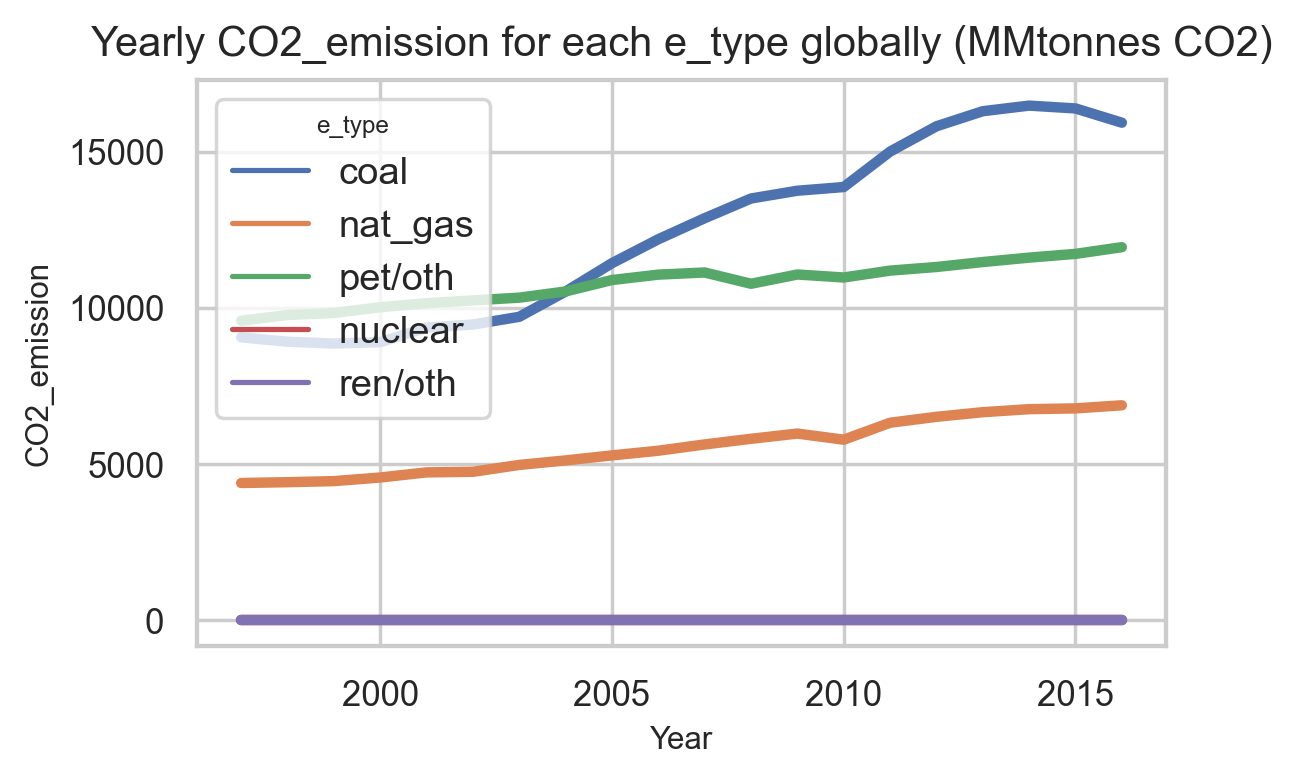

In [72]:
'''
FOR WORLD DATA: Plotting CO2 EMission per Year for 
Coal, Petroleum, Natural Gas, NUclear & Renewable Energy Types 
'''

with plt.rc_context(rc = {'figure.dpi': 250, 'axes.labelsize': 9,
                          'xtick.labelsize': 10, 'ytick.labelsize': 10,
                          'legend.title_fontsize': 7, 'axes.titlesize': 12,
                          'axes.titlepad': 7}):

    # Data with only the 'World' values
    wd = df[df['Country']=='World']

    
    fig, ax = plt.subplots(1, 1, figsize = (5, 3))
   
    sns.lineplot(data=wd[wd['e_type']!='all'],
            x='Year',
            y='CO2_emission',
            hue='e_type',
            lw=3,
            ).set_title('Yearly CO2_emission for each e_type globally (MMtonnes CO2)')

As We can See;  The leading Energy source in terms of CO2 Emission is Coal with a World Total Peak of Over `16,400 (MMtonnes CO2)`, followed by Petroleum at `11,750 (MMtonnes CO2)` and still raising. 
**We also see Natural Gas Total at about `6,500 (MMtonnes CO2)` which is about Half of what Coal & Pertroleum Produces Individually. All as of 2015**

#### 3.7.2 Comparing Time Series Beteen Top Emitting Country & Top Emitting_per_Capita Country

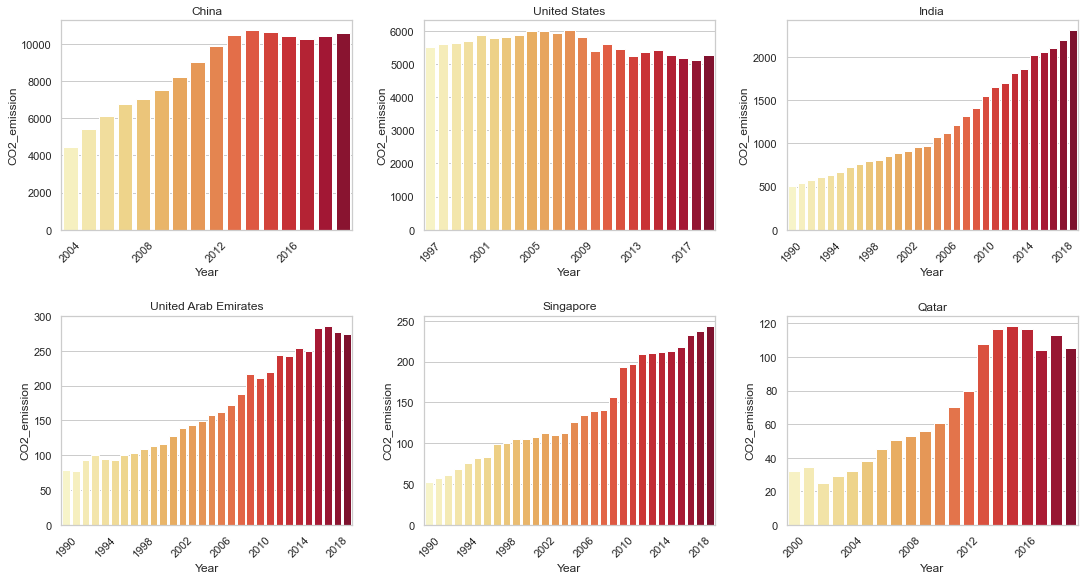

In [42]:
'''
Let's Visualise the actual CO2 Emission 
of Our Top 3 Emitting Countries & 
Our Top emitting_per_capita Countries
'''
fig, ax = plt.subplots(2, 3, figsize = (15, 8))

# List of focused Countries
countries = ['China','United States', 'India', 'United Arab Emirates', 'Singapore', 'Qatar' ]

# Average CO2 Emission each year for top 6 emiters
for idx, (country, axes) in enumerate(zip(countries, ax.flatten())):       
    cd3 = df[df['Country']==country][df['e_type']=='all']
    temp_data = cd3.groupby(['Year'])['CO2_emission'].sum().reset_index().sort_values(by='CO2_emission',ascending=False)
    plot_ = sns.barplot(ax=axes, data=temp_data, x='Year', y='CO2_emission', palette="YlOrRd")
    
    axes.set_title(country)  # Title
    # Reducing Density of X-ticks
    for ind, label in enumerate(plot_.get_xticklabels()):
        if ind % 4 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    
    # Rotating X axis
    for tick in axes.get_xticklabels():
        tick.set_rotation(45)
    
### Removing empty figures
else:
    [axes.set_visible(False) for axes in ax.flatten()[idx + 1:]]
    
plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
plt.show()

The above is a clear Conlusion on the matter showing Though UAE has an emission max at about `300 (MMtonnes CO2)` and China at Over `10,000 (MMtonnes CO2)`, UAE is worst at CO2 Emission as compared to China. `Same comparing US & Singapore, India & Qatar`

In [43]:
'''
Time Series for Top Emitting Country
Country: China
'''
c_df = df[df['Country']== 'China'][['Year', 'e_type','GDP', 'Population',
                                    'e_con', 'Deforestation', 'emission_per_cap', 'CO2_emission']]
c_df = c_df[c_df['e_type']== 'all'].drop('e_type', axis=1)
# Seperate country because it's an Object variable
ot = c_df.drop(['Year'], axis=1)
c = c_df['Year'].to_list()
# Scale the features to be compared to deal with Range Variation
sc = StandardScaler()
ot_s= pd.DataFrame(sc.fit_transform(ot), columns=ot.columns)
# Join Tables
china_comp = ot_s.copy()
china_comp['Year'] = c
# Plot Multiple line graph
fig5 = px.line(china_comp, x='Year', y=['emission_per_cap', 'CO2_emission', 
                                        'GDP', 'Population', 'Deforestation'], 
               title='Time Series for our Top Emitting Country = CHINA')

fig5.show()

China clearly `was` not doing well in terms of adpoting greener policies `in times past`, as we can see that her CO2 emission per capita is racing side-by-side with her actual CO2 Emission and GDP Growth. These was much terrible between 2012-2015, but as we can see [China's Economic Strategy in 2016](https://thediplomat.com/2015/12/china-unveils-economic-strategy-for-2016/), had the Chinese leaders vowing to confront the overcapacity problem as part of supply-side reforms. `Understand,` Overcapcity & Population raise may sound similar but doesn't eitherly mean the same thing. `Paraphrasing the official statement released after the conference, “The nation will study and formulate a set of policies aimed at resolving industrial overcapacity, as the supply glut has presented a major challenge to growth.”`. This move as you can see above, is one of the decisions that lead to the quick switch to better lesser co2 emitting processes even with a continous raise in GDP, Population and Deforestation.

In [44]:
'''
Time Series for Top Emitting_per_Capita Country
Country: UAE (United Arab Emirates)
'''
u_df = df[df['Country']== 'United Arab Emirates'][['Year', 'e_type','GDP', 'Population',
                                    'e_con', 'Deforestation', 'emission_per_cap', 'CO2_emission']]
u_df = u_df[u_df['e_type']=='all'].drop('e_type', axis=1)
# Seperate country because it's an Object variable
ot = u_df.drop(['Year'], axis=1)
c = u_df['Year'].to_list()
# Scale the features to be compared to deal with Range Variation
sc = StandardScaler()
ot_s= pd.DataFrame(sc.fit_transform(ot), columns=ot.columns)
# Join Tables
UAE_comp = ot_s.copy()
UAE_comp['Year'] = c
# Plot Multiple line graph
fig6 = px.line(UAE_comp, x='Year', y=['emission_per_cap', 'CO2_emission', 
                                        'GDP', 'Population', 'Deforestation'], 
               title='Time Series for our Top Emitting_per_Capita Country (UAE)')

fig6.show()

The UAE has remained Busy with her manufacturing sector and of course as a leading country in terms of Petroleum production, and also being the one of the tourist center of the world, it's only normal for we to see the high peak in CO2_emission_per_capita comming from here; But she has got two very good signs as we can see from above graph;

1. She has greatly matched reducing the CO2_emission_per_capita even with her every increasing activities, from policies to embracing Technology. See [The UAE's response to climate change Article](https://u.ae/en/information-and-services/environment-and-energy/climate-change/theuaesresponsetoclimatechange): The UAE monitors the emission of gases that lead to the greenhouse effect and has reduced its per capita carbon emissions. Due to better technology and transition to more natural gas in power plants, emissions of carbon dioxide (CO2) per capita have decreased.
2. She has flatten the Deforestation quick raise, proving her committment towards a more greener world. [CNN Reports](https://edition.cnn.com/2019/07/15/middleeast/abu-dhabi-mangroves-scn-intl/index.html) revealing Abu Dhabi is replanting mangroves in the fight against climate change

In [45]:
'''
Comparing Total GDP, Manuf_GDP, & Agric_GDP
Country: WORLD
'''
g_df = df[df['Country']== 'United Arab Emirates'][['Year', 'e_type','GDP', 'Manuf_GDP',
                                    'Agric_GDP', 'emission_per_cap', 'CO2_emission']]
g_df = g_df[g_df['e_type']=='all'].drop('e_type', axis=1)
# Seperate country because it's an Object variable
ot = g_df.drop(['Year'], axis=1)
c = g_df['Year'].to_list()
# Scale the features to be compared to deal with Range Variation
sc = StandardScaler()
ot_s= pd.DataFrame(sc.fit_transform(ot), columns=ot.columns)
# Join Tables
GDP_comp = ot_s.copy()
GDP_comp['Year'] = c
# Plot Multiple line graph
fig7 = px.line(GDP_comp, x='Year', y=['emission_per_cap', 'CO2_emission', 
                                        'GDP', 'Manuf_GDP', 'Agric_GDP'], 
               title='WORLD Comparison of Total GDP, Manuf_GDP, & Agric_GD')

fig7.show()

Remember the [Global Economic Recession 2007-2009](https://www.investopedia.com/terms/g/great-recession.asp)???

The global financial crisis (GFC) which refers to the period the world experienced extreme stress in global financial markets and banking systems, occurred between mid-2007 and early 2009. This as we can see has been clearly captured by this dataset. If not for this event, it was an upward trajectory for the Manufacturing Industry (Purple Line)  in terms of `World GDP and CO2 emissions`, which is the Contributing sector of GDP that sustained its trajectory resulting in the corresponding rise in CO2 Emissions.

Simply put: `Manufacturing GDP Contribution is the primary GDP factor that correlates the direct rise in GDP to CO2 emission.`

Also; It's worthy of mentioning that we can see a stip decline in Co2 emission per capita (GLOBALLY) even with the raise in ManuFacturing GDP & CO2 emission; This shows that the world is actually taking a good turn towards lesser CO2 Emissions by adopting safer manufacturing technologies and processes. In Fact, This shows, that while we are gradually migrating to more greener energy sources, we will be seeing a much decline in CO2 Emissions.

**`It's also great news to see that the Agricultural sector is picking up again globally.`**

#### 3.7.3 Choropleth of CO2 Emission per Capita of each country (MMtonnes CO2 per capita)

In [63]:
cd2 = df[df['Country']!='World'][df['e_type']=='all']

temp_cd5 = cd2[['Country', 'Year', 'emission_per_cap']].groupby(['Country','Year']).sum().reset_index()

px.choropleth(data_frame=temp_cd5, locations="Country", locationmode='country names', 
              animation_frame= 'Year', color='emission_per_cap', 
              title="CO2 Emission per Capita of each country from 1990 to 2019 (MMtonnes CO2 Per Capita)")

<a id="four"></a>
## 4. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Feature engineering ⚡ |
| :--------------------------- |
| In this section we will be manipulating — adding, deleting, combinating, and mutating — of your data set if need be, to improve machine learning model training, leading to better performance and greater accuracy. Most of this have been done alongside or remains identified in the EDA phase. So, let's Proceed towards execution |

---

In [73]:
df.head()

Country   e_type  Year  e_con  e_prod   GDP  Population  \
1998  Antigua and Barbuda      all  1990   0.01     0.0  0.98       62.53   
1999  Antigua and Barbuda     coal  1990   0.00     0.0  0.98       62.53   
2000  Antigua and Barbuda  nat_gas  1990   0.00     0.0  0.98       62.53   
2001  Antigua and Barbuda  pet/oth  1990   0.01     0.0  0.98       62.53   
2002  Antigua and Barbuda  nuclear  1990   0.00     0.0  0.98       62.53   

      ei_capita  ei_gdp  pop_growth  pop_density  Manuf_GDP  Agric_GDP  \
1998      95.45    6.07       0.845       142.12   0.024676   0.017454   
1999      95.45    6.07       0.845       142.12   0.024676   0.017454   
2000      95.45    6.07       0.845       142.12   0.024676   0.017454   
2001      95.45    6.07       0.845       142.12   0.024676   0.017454   
2002      95.45    6.07       0.845       142.12   0.024676   0.017454   

      Deforestation  emission_per_cap  CO2_emission  
1998       101.0988          0.006397           0.4  
1999       101.0988          0.000000           0.0  
2000       101.0988          0.000000           0.0  
2001       101.0988          0.006397           0.4  
2002       101.0988          0.000000           0.0

In [74]:
# Checking missing values/ features
for var in df:
    print(f'{var}: {df[var].isnull().sum()}')

Country: 0
e_type: 0
Year: 0
e_con: 0
e_prod: 0
GDP: 0
Population: 0
ei_capita: 0
ei_gdp: 0
pop_growth: 0
pop_density: 0
Manuf_GDP: 0
Agric_GDP: 0
Deforestation: 0
emission_per_cap: 0
CO2_emission: 0


In [80]:
# feature Selection SEE HEATMAP
wf = df.copy()
# Drop Country and Year
all_df = wf.drop(['Country', 'Year'], axis=1)

In [81]:
# engineer existing features

# List Energy Types
energy_types = all_df['e_type'].unique().tolist()
# Encoding The Energy Types
all_df["e_type"].replace({"all": 0, "coal": 1, "nat_gas": 2, 
                         "pet/oth": 3, "nuclear": 4, "ren/oth": 5}, inplace=True)

In [82]:
# Review
all_df.head(20)

e_type  e_con  e_prod     GDP  Population  ei_capita  ei_gdp  \
1998       0   0.01    0.00    0.98       62.53      95.45    6.07   
1999       1   0.00    0.00    0.98       62.53      95.45    6.07   
2000       2   0.00    0.00    0.98       62.53      95.45    6.07   
2001       3   0.01    0.00    0.98       62.53      95.45    6.07   
2002       4   0.00    0.00    0.98       62.53      95.45    6.07   
2003       5   0.00    0.00    0.98       62.53      95.45    6.07   
2004       0   1.88    2.01  405.45    32675.95      57.42    4.63   
2005       1   0.04    0.01  405.45    32675.95      57.42    4.63   
2006       2   0.74    0.65  405.45    32675.95      57.42    4.63   
2007       3   0.83    1.09  405.45    32675.95      57.42    4.63   
2008       4   0.08    0.08  405.45    32675.95      57.42    4.63   
2009       5   0.19    0.19  405.45    32675.95      57.42    4.63   
2016       0   3.85    6.59  514.47    17092.82     224.95    7.47   
2017       1   1.58    4.39  514.47    17092.82     224.95    7.47   
2018       2   0.65    0.78  514.47    17092.82     224.95    7.47   
2019       3   1.48    1.27  514.47    17092.82     224.95    7.47   
2020       4   0.00    0.00  514.47    17092.82     224.95    7.47   
2021       5   0.13    0.15  514.47    17092.82     224.95    7.47   
2022       0   1.16    0.47  268.94     7686.11     150.71    4.31   
2023       1   0.12    0.03  268.94     7686.11     150.71    4.31   

      pop_growth  pop_density   Manuf_GDP  Agric_GDP  Deforestation  \
1998       0.845      142.120    0.024676   0.017454   1.010988e+02   
1999       0.845      142.120    0.024676   0.017454   1.010988e+02   
2000       0.845      142.120    0.024676   0.017454   1.010988e+02   
2001       0.845      142.120    0.024676   0.017454   1.010988e+02   
2002       0.845      142.120    0.024676   0.017454   1.010988e+02   
2003       0.845      142.120    0.024676   0.017454   1.010988e+02   
2004       1.453       11.919  108.620055  32.938758   3.520478e+05   
2005       1.453       11.919  108.620055  32.938758   3.520478e+05   
2006       1.453       11.919  108.620055  32.938758   3.520478e+05   
2007       1.453       11.919  108.620055  32.938758   3.520478e+05   
2008       1.453       11.919  108.620055  32.938758   3.520478e+05   
2009       1.453       11.919  108.620055  32.938758   3.520478e+05   
2016       1.480        2.221   70.960847  21.587161   1.338794e+06   
2017       1.480        2.221   70.960847  21.587161   1.338794e+06   
2018       1.480        2.221   70.960847  21.587161   1.338794e+06   
2019       1.480        2.221   70.960847  21.587161   1.338794e+06   
2020       1.480        2.221   70.960847  21.587161   1.338794e+06   
2021       1.480        2.221   70.960847  21.587161   1.338794e+06   
2022       0.762       92.975   52.661141   8.329072   3.775640e+04   
2023       0.762       92.975   52.661141   8.329072   3.775640e+04   

      emission_per_cap  CO2_emission  
1998          0.006397          0.40  
1999          0.000000          0.00  
2000          0.000000          0.00  
2001          0.006397          0.40  
2002          0.000000          0.00  
2003          0.000000          0.00  
2004          0.003286        107.37  
2005          0.000115          3.76  
2006          0.001334         43.60  
2007          0.001836         60.00  
2008          0.000000          0.00  
2009          0.000000          0.00  
2016          0.016413        280.54  
2017          0.008959        153.13  
2018          0.001845         31.54  
2019          0.005608         95.86  
2020          0.000000          0.00  
2021          0.000000          0.00  
2022          0.006551         50.35  
2023          0.001602         12.31

In [83]:
# Check shape if we have sufficient rep. data to model & Test with.
all_df.shape

(27450, 14)

In [84]:
# Standardize/Scale our Dataset
scaler = StandardScaler() # create scaler object
# convert the scaled predictor values into a dataframe
ready = pd.DataFrame(scaler.fit_transform(all_df), columns=all_df.columns)

In [86]:
# Extracting features and label; Readying for Split 
X = ready.drop(['CO2_emission'], axis=1)
y = ready['CO2_emission']

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---
We will be Modelling with the Following;
1. Base Modelling (linear regressions);
    * Linear Regression(It targets predicting value based on independent variables)
    * Ridge Regression (A regressional model tuning method that is used to analyse any data that suffers from multicollinearity)
    * Lasso Regression (A type of linear regression that uses shrinkage method, where data values are shrunk towards a central point, like the mean)

2. Tree-Based Models;
    * Random Forest (It builds decision trees on different samples and takes their majority vote for classification and average in case of regression)
    * XGBoost (A scalable and highly accurate implementation of gradient boosting that pushes the limits of computing power for boosted tree algorithms, being built largely for energizing machine learning model performance and computational speed.)

3. Glass Box Modelling Approach (all the features and the model parameters are known as means of Model check.)

4. Bias Model (Used to Intarogate our model/Training process for Bias, Describing how well our model matches the training set)

In [87]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False, random_state=42)

In [97]:
# creating one or more ML models

# Creating linear model
lm = LinearRegression()

# Creating ridge model
ridge = Ridge()

# Creating LASSO model object, setting alpha to 0.01
# Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square
lasso = Lasso(alpha=0.01) 

# Creating Decision Tree model with a max depth of 5 
DT = DecisionTreeRegressor(max_depth=5)

# Our forest consists of 100 trees with a max depth of 5 
RF = RandomForestRegressor(n_estimators=100, max_depth=5)

#create Xgboost
xg_reg_all = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.6, learning_rate = 0.1,
                max_depth = 5, alpha = 6, n_estimators = 100, subsample = 0.7) 

In [98]:
# Fit the Ml model
lm.fit(x_train, y_train)
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)
DT.fit(x_train, y_train)
RF.fit(x_train, y_train)
xg_reg_all.fit(x_train, y_train)

XGBRegressor(alpha=6, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=6, ...)

In [99]:
# evaluate one or more ML models [Getting Predictions]
y_pred_lm = lm.predict(x_test)
y_pred_ridge = ridge.predict(x_test)
y_pred_lasso = lasso.predict(x_test)
y_pred_DT = DT.predict(x_test)
y_pred_RF = RF.predict(x_test)
y_pred_xgb = xg_reg_all.predict(x_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

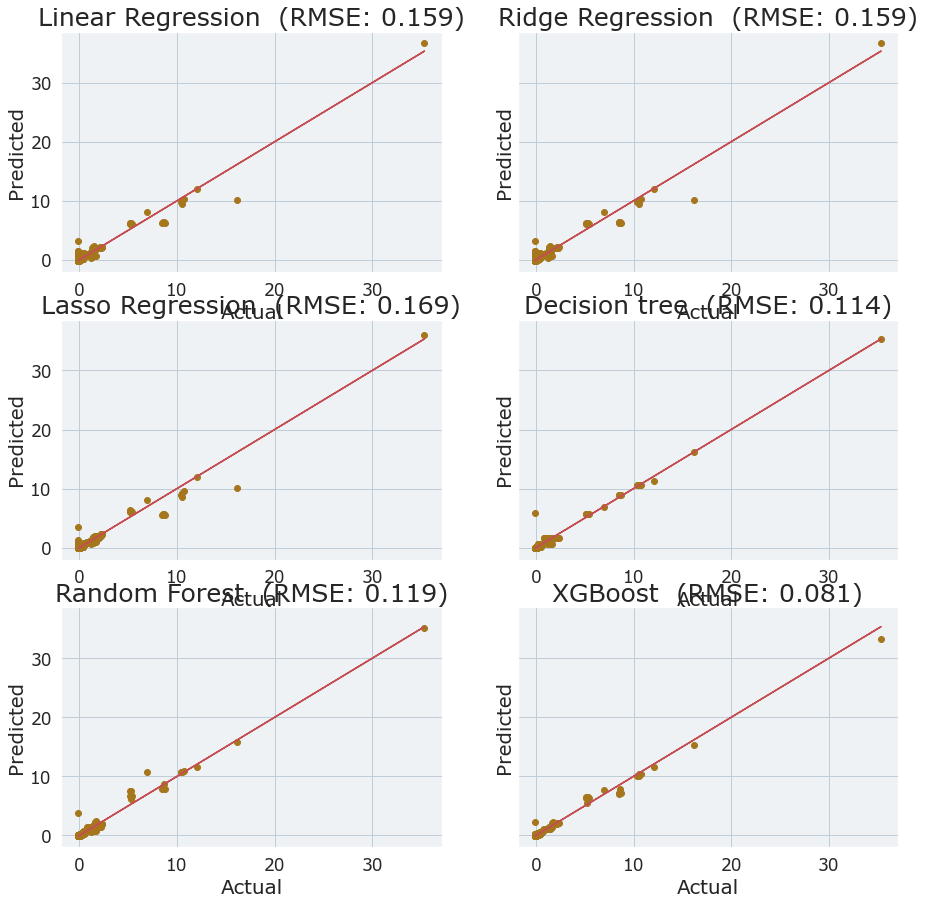

In [125]:
# Compare model performance

# Create figure and axes
f, ax = plt.subplots(figsize=(15,15), nrows=3, ncols=2, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [y_pred_lm, y_pred_ridge, y_pred_lasso, y_pred_DT, y_pred_RF, y_pred_xgb]
title = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
         'Decision tree', 'Random Forest', 'XGBoost']
ax = ax.flatten()
# Loop through all axes to plot each model's results 
for i in range(6):
    rmse = round(np.sqrt(mean_squared_error(pred[i], y_test)), 3)
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test,'r')
    ax[i].scatter(y_test, pred[i]) 

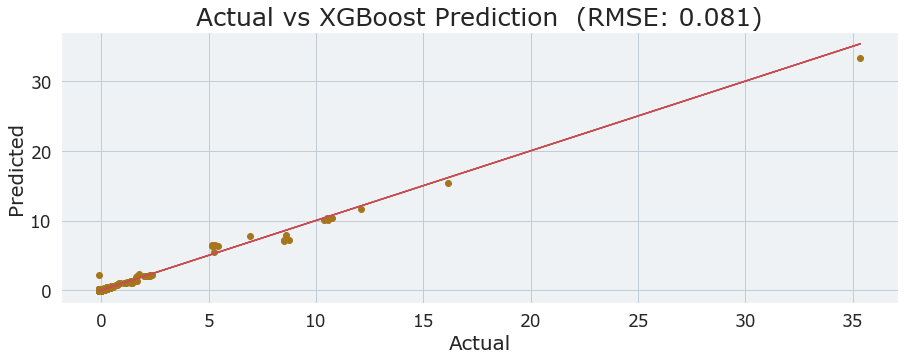

In [128]:
# Choose best model and motivate why it is the best choice

# Create figure and axes
f, ax = plt.subplots(figsize=(15,5))
rmse_xgb = round(np.sqrt(mean_squared_error(y_pred_xgb, y_test)), 3)
# Plot on axes
ax.set_title('Actual vs XGBoost Prediction'+"  (RMSE: "+str(rmse_xgb)+ ")")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test, y_pred_xgb)
ax.plot(y_test, y_test,'r')
plt.show()

Now; We can confidently say that the Tree-Based Model (XGBoost) has out done the other model with a Root Mean Square Error of `0.081`, which is close to Zero, which is a good result.

Root mean square error or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. `It shows how far predictions fall from measured true values using Euclidean distance.` Hence our Close to Zero Value is a very Good Result.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [55]:
# discuss chosen methods logic